In [2]:
import cv2
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

[(855.9670360908622, 760.1622766716918, 68.80994207407969, 57.10922405540259), (446.03593120154306, 701.3452501306697, 86.95468477701792, 61.709472094943294), (71.1642333004744, 497.48751086357305, 66.66058898914423, 48.63153798962804), (989.2575707130053, 461.20868596456575, 51.334957000424424, 68.54429853950268), (604.5890254107139, 355.2057414605292, 71.62905278829851, 81.62223264481793)]
['white and red helicopter', 'blue and yellow fighter jet', 'grey and white fighter plane', 'white fighter jet', 'grey and black fighter plane']


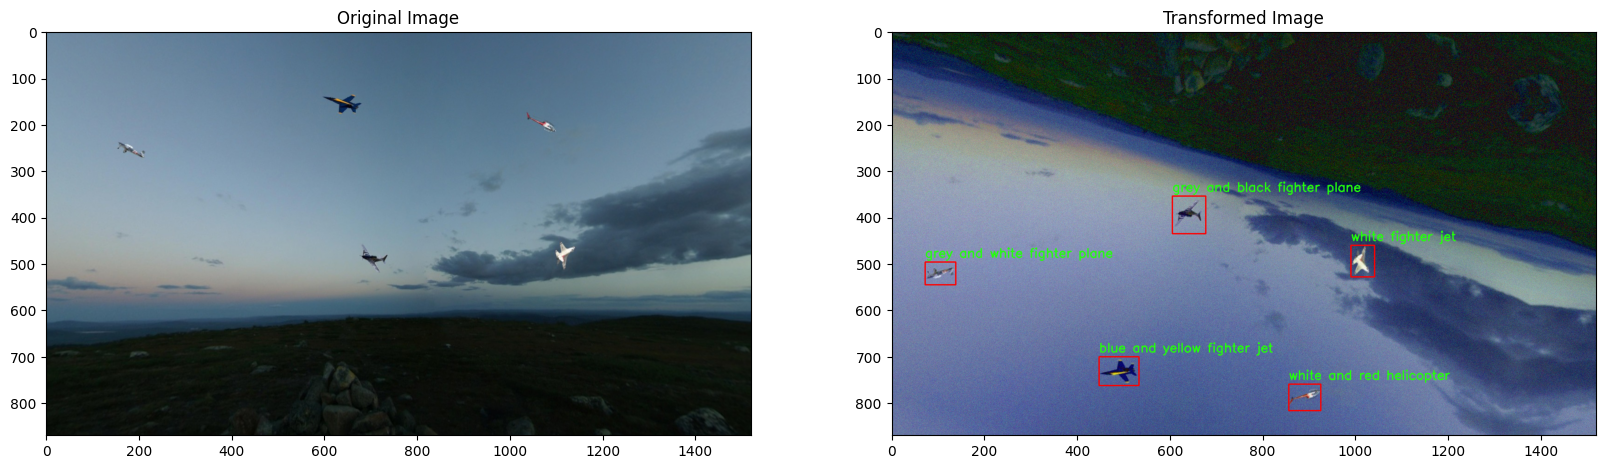

In [13]:
image = cv2.imread("data/images/image_5.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

data = [{"caption": "white and red helicopter", "bbox": [1036, 176, 64, 40]}, {"caption": "blue and yellow fighter jet", "bbox": [596, 136, 84, 40]}, {"caption": "grey and white fighter plane", "bbox": [152, 240, 64, 32]}, {"caption": "white fighter jet", "bbox": [1100, 456, 40, 56]}, {"caption": "grey and black fighter plane", "bbox": [676, 456, 60, 64]}]
captions = [d["caption"] for d in data]
bboxes = [d["bbox"] for d in data]

tranform = A.Compose([
    A.GridDistortion(p=0.5),
    A.RandomCrop(width=640, height=640, p=0.5),
    A.ShiftScaleRotate(p=1),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=1),
    A.HueSaturationValue(p=1),
    A.AdvancedBlur(blur_limit=3, p=0.5),
    A.RandomRain(p=0.5),
    A.GaussNoise(p=1, var_limit=(10.0, 150.0), per_channel=True),
    A.ISONoise(p=1, intensity=(0.1, 0.5), color_shift=(0.01, 0.05)),
], bbox_params=A.BboxParams(format='coco', label_fields=['captions'], min_visibility=0.2))

transformed = tranform(image=image, bboxes=bboxes, captions=captions)
transformed_image = transformed["image"]
transformed_bboxes = transformed["bboxes"]
transformed_captions = transformed["captions"]

print(transformed_bboxes)
print(transformed_captions)

for bbox, caption in zip(transformed_bboxes, transformed_captions):
    x, y, w, h = bbox
    x1, y1, x2, y2 = int(x), int(y), int(x+w), int(y+h)
    cv2.rectangle(transformed_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(transformed_image, caption, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
# show both images side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[1].imshow(transformed_image)
ax[1].set_title("Transformed Image")
plt.show()

